In [76]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data =pd.read_csv("Mobile Price Prediction Datatset.xls")
data.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [78]:
data_copy=data.copy()

In [79]:
data.tail()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
831,831,Karbonn K24 Plus Pro,3.8,6.0,32.0,4.54,48,12.0,2800,1299
832,832,InFocus POWER 2,4.1,8.0,64.0,4.54,64,NaN,2500,1390
833,833,"Alcatel 5V (Spectrum Blue, 32 )",4.4,3.0,32.0,6.20,48,1.0,3800,9790
834,834,JIVI JV 12M,3.7,10.0,32.0,4.50,64,NaN,3500,799
835,835,Blacear B5 Grip,3.5,6.0,32.0,4.50,64,15.0,1050,799


In [80]:
data.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [81]:
# In Ram and Rom there are some values where ram is Zero which cannot be true.

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


In [83]:
# droping unnecessary columns.
data.drop(['Unnamed: 0','Ratings'],axis=1,inplace=True)

In [84]:
data.head()

,Brand me,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.0,128.0,6.00,48,13.0,4000,24999
1,I Kall K11,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia 105 ss,4.0,4.0,4.50,64,16.0,4000,15000
3,"Samsung Galaxy A50 (White, 64 )",6.0,64.0,6.40,48,15.0,3800,18999
4,"POCO F1 (Steel Blue, 128 )",6.0,128.0,6.18,35,15.0,3800,18999


In [85]:
#keeping only the brand name and removing the device name
# Extracting the first word before space
data['brand'] = data['Brand me'].str.split().str[0]
data

,Brand me,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,brand
0,"LG V30+ (Black, 128 )",4.0,128.0,6.00,48,13.0,4000,24999,LG
1,I Kall K11,6.0,64.0,4.50,48,12.0,4000,15999,I
2,Nokia 105 ss,4.0,4.0,4.50,64,16.0,4000,15000,Nokia
3,"Samsung Galaxy A50 (White, 64 )",6.0,64.0,6.40,48,15.0,3800,18999,Samsung
4,"POCO F1 (Steel Blue, 128 )",6.0,128.0,6.18,35,15.0,3800,18999,POCO
...,...,...,...,...,...,...,...,...,...
831,Karbonn K24 Plus Pro,6.0,32.0,4.54,48,12.0,2800,1299,Karbonn
832,InFocus POWER 2,8.0,64.0,4.54,64,NaN,2500,1390,InFocus
833,"Alcatel 5V (Spectrum Blue, 32 )",3.0,32.0,6.20,48,1.0,3800,9790,Alcatel
834,JIVI JV 12M,10.0,32.0,4.50,64,NaN,3500,799,JIVI


In [86]:
data.drop('Brand me',axis=1,inplace=True)

In [87]:
# Define the new column order
new_order = ['brand', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price']

# Reindex columns
data = data.reindex(columns=new_order)
data.head()

,brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,LG,4.0,128.0,6.00,48,13.0,4000,24999
1,I,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia,4.0,4.0,4.50,64,16.0,4000,15000
3,Samsung,6.0,64.0,6.40,48,15.0,3800,18999
4,POCO,6.0,128.0,6.18,35,15.0,3800,18999


In [88]:
data.rename(columns={'brand':'Brand'},inplace=True)
data.head()

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,LG,4.0,128.0,6.00,48,13.0,4000,24999
1,I,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia,4.0,4.0,4.50,64,16.0,4000,15000
3,Samsung,6.0,64.0,6.40,48,15.0,3800,18999
4,POCO,6.0,128.0,6.18,35,15.0,3800,18999


## Data-Preprocessing

In [90]:
#checking null values
data.isnull().sum()

Brand              0
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [91]:
#impute missing values
data.loc[data['RAM'].isnull()==True]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
28,Lava,NaN,32.0,4.5,64,23.0,3000,1599
93,Samsung,NaN,64.0,4.4,64,NaN,3500,1100
96,Samsung,NaN,64.0,2.0,64,NaN,3500,1625
166,Samsung,NaN,64.0,4.4,64,8.0,3500,1200
351,Samsung,NaN,64.0,4.4,64,NaN,3500,1346
523,Samsung,NaN,64.0,4.4,64,13.0,3500,1100
616,Samsung,NaN,64.0,4.4,64,NaN,3500,1346


In [92]:
#definig a function to check null value rows
def show_null(column_name):
    if column_name in data.columns:
        return data.loc[data[column_name].isnull()==True]

In [93]:
show_null('ROM')

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
94,Samsung,3.0,NaN,NaN,64,NaN,3800,1790
139,Samsung,4.0,NaN,4.40,64,NaN,3500,1549
367,Kechaoda,8.0,NaN,4.77,48,NaN,2500,1045
493,Lava,8.0,NaN,4.58,64,NaN,1750,1840


In [94]:
show_null('Mobile_Size')

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
94,Samsung,3.0,NaN,NaN,64,NaN,3800,1790
120,Micax,6.0,2.4,NaN,48,NaN,3000,1190


In [95]:
show_null('Selfi_Cam')

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
12,Wizphone,2.0,16.0,5.50,8,NaN,4200,5498
16,Kechaoda,6.0,32.0,3.70,64,NaN,4700,990
20,InFocus,8.0,64.0,4.54,64,NaN,2500,1199
22,Karbonn,6.0,32.0,4.54,48,NaN,3000,1349
26,Blacear,12.0,24.0,2.00,64,NaN,1550,1690
...,...,...,...,...,...,...,...,...
823,Lava,6.0,32.0,4.54,64,NaN,2500,1695
826,Easyfone,6.0,32.0,4.52,48,NaN,3500,2599
830,InFocus,6.0,32.0,4.50,48,NaN,3000,898
832,InFocus,8.0,64.0,4.54,64,NaN,2500,1390


In [96]:
#using column imputer to impute missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [97]:
columns_to_imput=['RAM','ROM','Mobile_Size','Selfi_Cam']
data[columns_to_imput]=imputer.fit_transform(data[columns_to_imput])

In [98]:
data.head()

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,LG,4.0,128.0,6.00,48,13.0,4000,24999
1,I,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia,4.0,4.0,4.50,64,16.0,4000,15000
3,Samsung,6.0,64.0,6.40,48,15.0,3800,18999
4,POCO,6.0,128.0,6.18,35,15.0,3800,18999


In [99]:
data.isnull().sum()

Brand            0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [100]:
len(data['Brand'].unique())

71

In [101]:
#also there were some values with zero ram and rom which is not possible so will remove or impute them according to domain knowledge.
data.loc[(data['RAM'] == 0) | (data['ROM'] == 0)]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
183,Callbar,0.0,64.0,4.50,48,8.0,3000,595
190,JIVI,30.0,0.0,4.50,64,8.0,3500,799
415,Jivi,0.0,64.0,4.54,64,8.0,3500,949


In [102]:
# Checking rows where the brand is 'JIVI' or 'Callbar'
filtered_brands = data.loc[data['Brand'].isin(['JIVI', 'Callbar','Jivi'])]

# Display the filtered rows
filtered_brands

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
46,Jivi,1.0,16.0,4.50,48,8.0,3000,798
47,Jivi,1.0,16.0,4.50,48,2.0,3000,869
59,JIVI,10.0,32.0,4.50,64,8.0,3000,799
71,JIVI,1.0,32.0,4.50,48,10.0,3500,799
85,Jivi,1.0,16.0,4.58,48,8.0,3000,1399
90,Jivi,5.0,32.0,4.54,48,8.0,3000,1049
91,Jivi,5.0,32.0,4.54,48,8.0,3000,999
118,JIVI,1.0,16.0,4.58,48,8.0,3800,2299
183,Callbar,0.0,64.0,4.50,48,8.0,3000,595
190,JIVI,30.0,0.0,4.50,64,8.0,3500,799


In [103]:
#removing values
data = data[(data['RAM'] != 0) & (data['ROM'] != 0)]

In [104]:
data.loc[(data['RAM'] == 0) | (data['ROM'] == 0)]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price


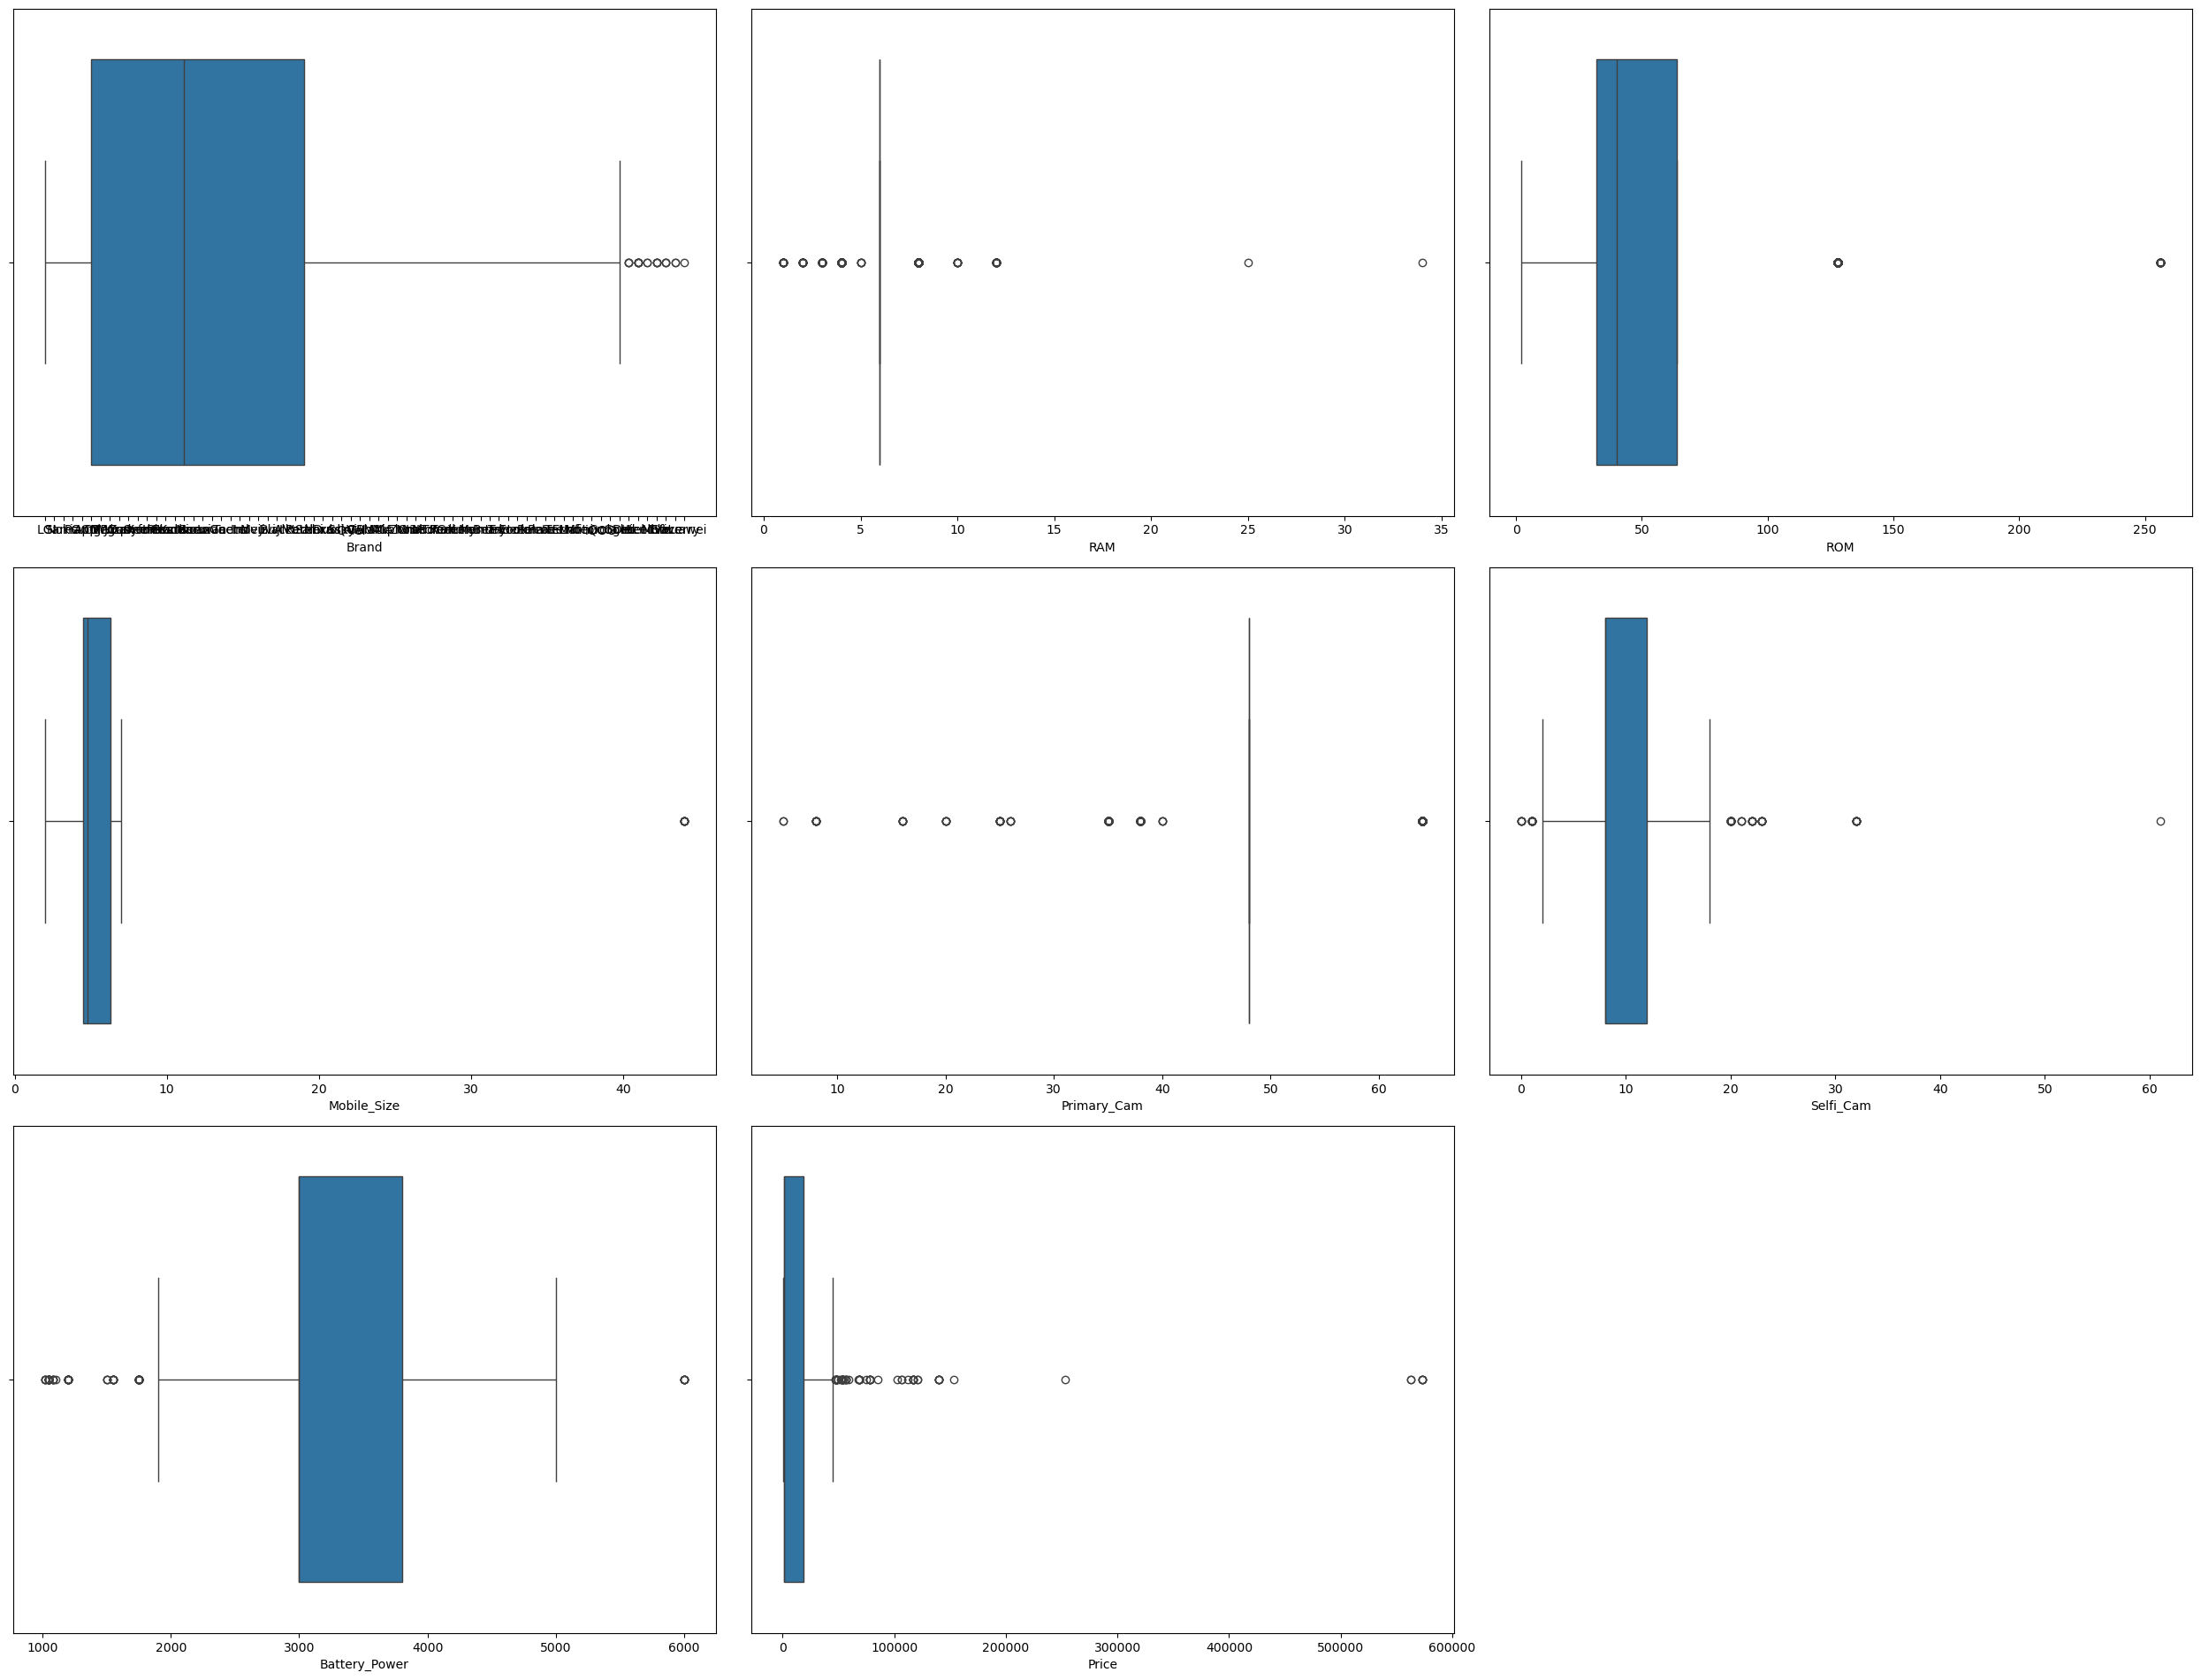

In [105]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in data:
    if plotnum<=8:
        a=plt.subplot(4,3,plotnum)
        sns.boxplot(data[col],orient="h")
        plotnum+=1
        plt.tight_layout()

In [106]:
# outlier handling IQR range
from scipy import stats

<Axes: xlabel='RAM', ylabel='Count'>

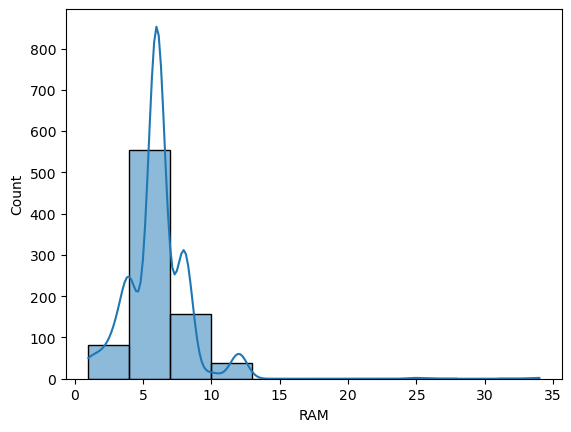

In [107]:
sns.histplot(data.RAM,kde=True)

<Axes: ylabel='RAM'>

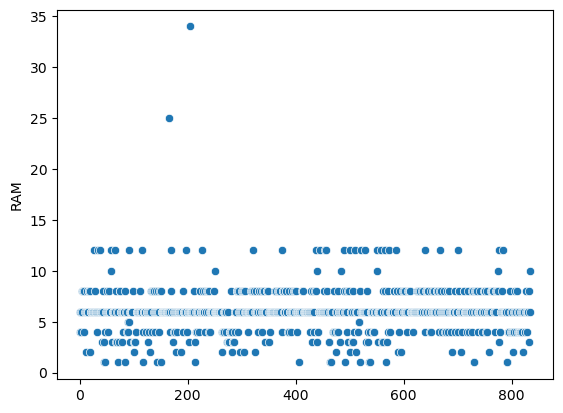

In [108]:
sns.scatterplot(data.RAM)

In [109]:
#the data seem quite normal so we use 3 sd rule to check for outliers
upper_limit = data.RAM.mean() + 3*data.RAM.std()
upper_limit

13.147548415390972

In [110]:
lower_limit =  data.RAM.mean() - 3*data.RAM.std()
lower_limit #ram cannot be negative

-1.0443071188723643

In [111]:
data.loc[data['RAM'] > upper_limit]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
165,Micax,25.0,25.0,4.54,48,8.0,3000,1199
205,Intex,34.0,64.0,4.50,48,21.0,3000,955


In [112]:
data = data[data['RAM'] <= upper_limit]

In [113]:
data.loc[data['RAM'] > upper_limit]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price


<Axes: xlabel='RAM', ylabel='Count'>

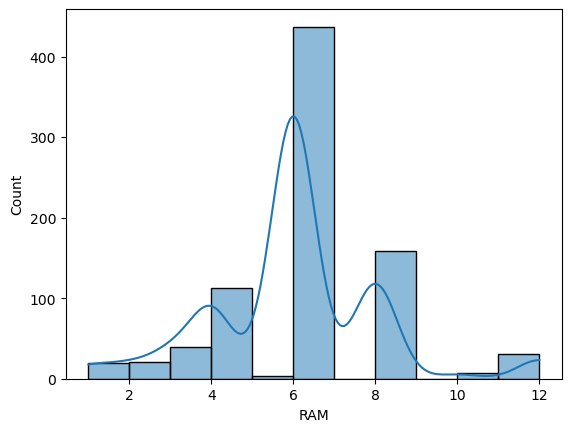

In [114]:
sns.histplot(data.RAM,kde=True)

### Handling Outliers in ROM

<Axes: xlabel='ROM', ylabel='Count'>

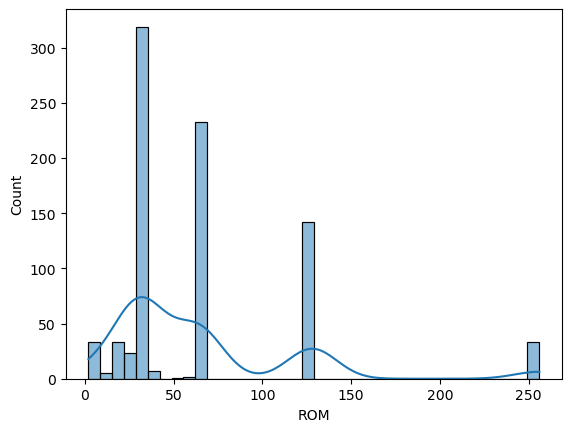

In [116]:
sns.histplot(data.ROM,kde=True)

<Axes: ylabel='ROM'>

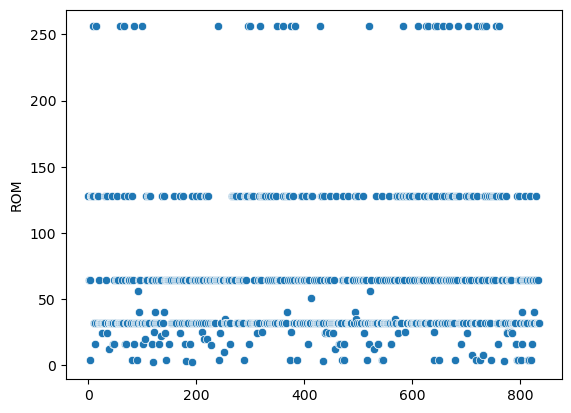

In [117]:
sns.scatterplot(data.ROM) #This are not outliers

### Outliers in mobile_size

<Axes: xlabel='Mobile_Size', ylabel='Count'>

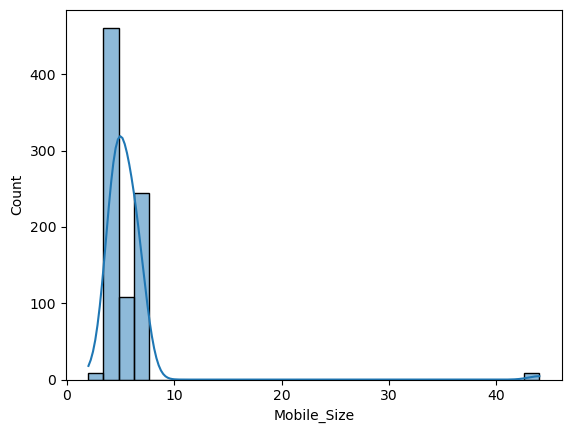

In [119]:
sns.histplot(data.Mobile_Size,kde=True,bins=30)

In [120]:
## using IQR to remove the outliers
IQR = stats.iqr(data.Mobile_Size, interpolation = 'midpoint') 

IQR

1.7999999999999998

In [121]:
# First quartile (Q1) 
Q1 = data.Mobile_Size.quantile(0.25)
print(Q1)

# Third quartile (Q3) 
Q3 =data.Mobile_Size.quantile(0.75)
print(Q3)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

4.5
6.3


In [122]:
print(min_limit,max_limit)

1.8000000000000003 9.0


In [123]:
data.loc[data['Mobile_Size'] > max_limit]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
160,GAMMA,6.0,32.0,44.0,48,8.0,3000,890
207,I,6.0,64.0,44.0,48,8.0,3500,899
242,I,6.0,64.0,44.0,48,8.0,3500,899
363,Kechaoda,6.0,32.0,44.0,48,5.0,3000,970
423,Kechaoda,6.0,32.0,44.0,48,15.0,3000,935
424,Kechaoda,6.0,32.0,44.0,48,15.0,3000,970
425,Kechaoda,6.0,32.0,44.0,48,15.0,3000,940
628,Kechaoda,6.0,32.0,44.0,48,8.0,3000,970


In [124]:
## imputing the outliers
data.loc[data['Mobile_Size'] > max_limit,'Mobile_Size']=np.median(data.Mobile_Size)

In [125]:
len(data.loc[data['Mobile_Size'] < 3.8])

24

In [126]:
data.loc[data['Mobile_Size'] < 3.8]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
16,Kechaoda,6.0,32.0,3.7,64,8.0,4700,990
21,Blacear,6.0,32.0,2.0,64,13.0,1550,1699
26,Blacear,12.0,24.0,2.0,64,8.0,1550,1690
96,Samsung,6.0,64.0,2.0,64,8.0,3500,1625
192,Samsung,4.0,2.0,2.0,48,8.0,3000,2025
302,Kechaoda,6.0,32.0,3.7,64,8.0,3500,990
307,Blacear,6.0,32.0,2.0,64,8.0,1550,1699
313,Kechaoda,6.0,32.0,3.7,16,8.0,3000,975
335,Kechaoda,6.0,32.0,3.7,16,8.0,3000,980
340,Kechaoda,6.0,32.0,3.7,64,8.0,5000,930


In [127]:
# Cap values below 3.7 inches
data['Mobile_Size'] = np.where(data['Mobile_Size'] < 3.7, 3.7, data['Mobile_Size'])

<Axes: ylabel='Mobile_Size'>

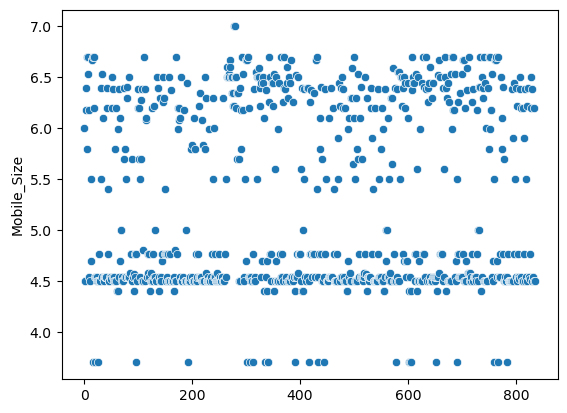

In [128]:
sns.scatterplot(data.Mobile_Size)

<Axes: xlabel='Mobile_Size', ylabel='Count'>

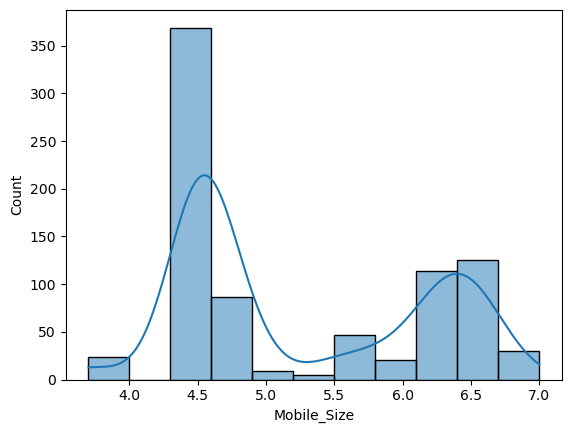

In [129]:
sns.histplot(data.Mobile_Size,kde=True)

### Primary Cam

<Axes: xlabel='Primary_Cam', ylabel='Count'>

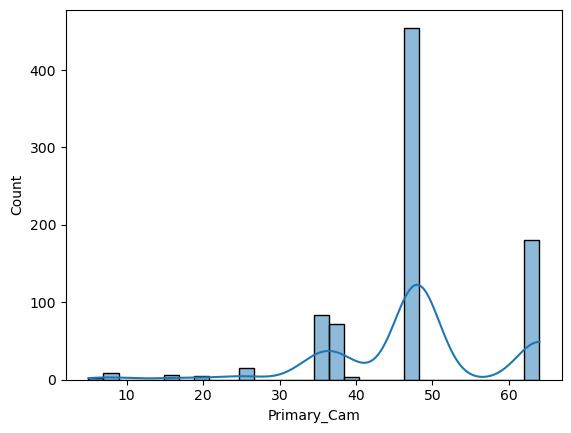

In [131]:
sns.histplot(data.Primary_Cam,kde=True,bins=30)

<Axes: ylabel='Primary_Cam'>

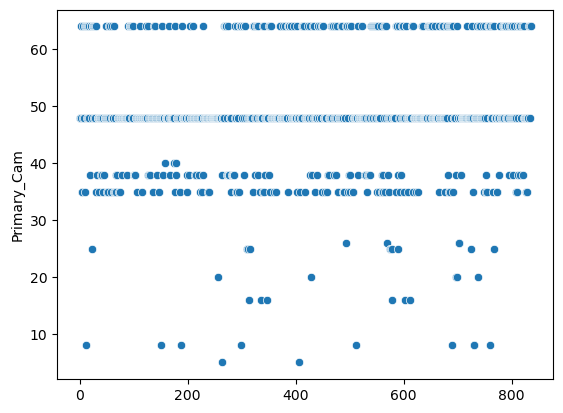

In [132]:
sns.scatterplot(data.Primary_Cam)

In [133]:
# we will transform this column data during feature engineering.

### Selfie_cam

<Axes: xlabel='Selfi_Cam', ylabel='Count'>

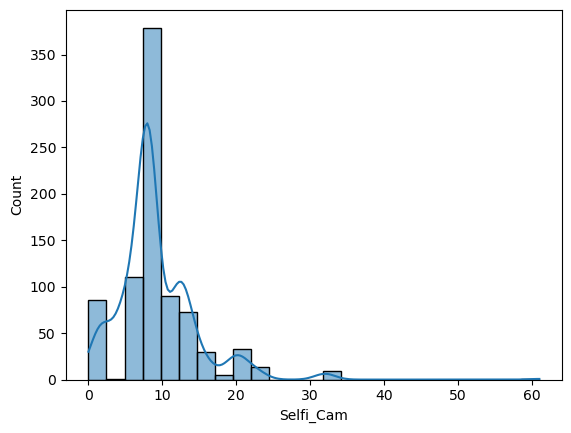

In [135]:
sns.histplot(data.Selfi_Cam,kde=True,bins=25)

<Axes: ylabel='Selfi_Cam'>

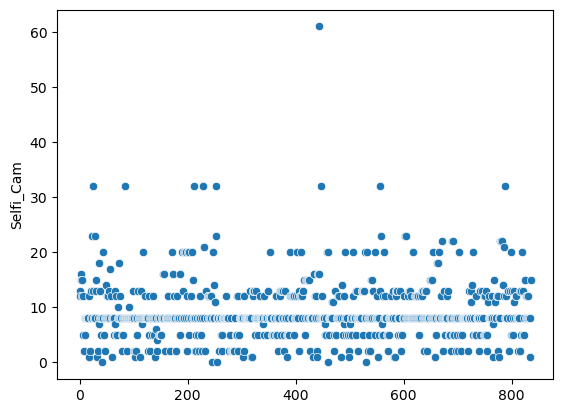

In [136]:
sns.scatterplot(data.Selfi_Cam)

In [137]:
## using IQR to remove the outliers
IQR = stats.iqr(data.Selfi_Cam, interpolation = 'midpoint') 

IQR

4.0

In [138]:
# First quartile (Q1) 
Q1 = data.Selfi_Cam.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.Selfi_Cam.quantile(0.75)

##getting the limits
min_limit=Q1 - 3*IQR

max_limit=Q3 +3*IQR

print(min_limit,max_limit)

-4.0 24.0


In [139]:
data.loc[data['Selfi_Cam'] > max_limit]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
24,Snexian,6.0,32.0,4.50,64,32.0,3000,649
83,Itel,6.0,32.0,4.54,48,32.0,1900,1570
211,MTR,8.0,64.0,4.77,48,32.0,3000,749
228,Karbonn,6.0,32.0,4.50,38,32.0,1750,999
229,Lava,8.0,64.0,4.54,64,32.0,2500,1710
253,Itel,6.0,32.0,4.50,48,32.0,3500,998
444,Micax,6.0,32.0,4.54,48,61.0,1750,1390
447,Vivo,6.0,128.0,6.39,48,32.0,3000,21099
556,Kechaoda,6.0,32.0,4.40,48,32.0,3800,930
787,Snexian,6.0,32.0,4.50,64,32.0,3000,649


In [140]:
# Cap values above max_limit
data['Selfi_Cam'] = np.where(data['Selfi_Cam'] > max_limit, max_limit, data['Selfi_Cam'])

In [141]:
data.loc[data['Selfi_Cam'] > max_limit]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price


<Axes: ylabel='Selfi_Cam'>

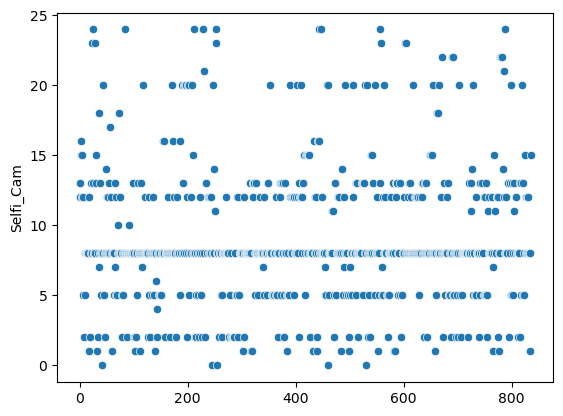

In [142]:
sns.scatterplot(data.Selfi_Cam)

<Axes: xlabel='Battery_Power', ylabel='Count'>

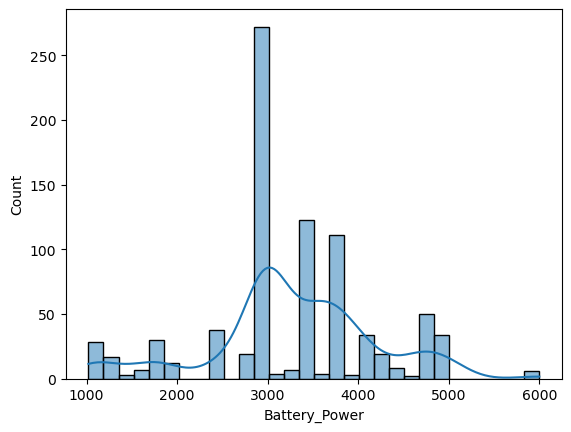

In [143]:
sns.histplot(data.Battery_Power ,kde=True)

<Axes: ylabel='Battery_Power'>

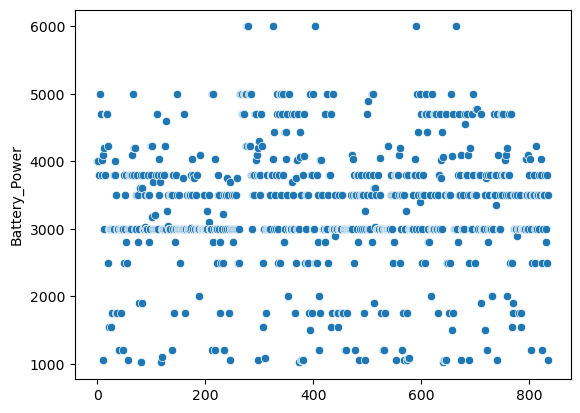

In [144]:
sns.scatterplot(data.Battery_Power)

In [145]:
## using IQR to remove the outliers
IQR = stats.iqr(data.Battery_Power, interpolation = 'midpoint') 

IQR

800.0

In [146]:
# First quartile (Q1) 
Q1 = data.Battery_Power.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.Battery_Power.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

print(min_limit,max_limit)

1800.0 5000.0


In [147]:
data.loc[data['Battery_Power'] > max_limit]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
278,Tecno,4.0,64.0,7.0,48,5.0,6000,9999
279,Tecno,4.0,64.0,7.0,48,5.0,6000,9999
326,Samsung,6.0,128.0,6.4,64,8.0,6000,19900
403,Samsung,6.0,128.0,6.4,64,8.0,6000,19900
591,Samsung,6.0,128.0,6.4,64,8.0,6000,19900
665,Samsung,6.0,128.0,6.4,64,8.0,6000,19900


In [148]:
data = data.loc[data['Battery_Power'] <= max_limit]

In [149]:
data.loc[data['Battery_Power'] > max_limit]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price


<Axes: ylabel='Battery_Power'>

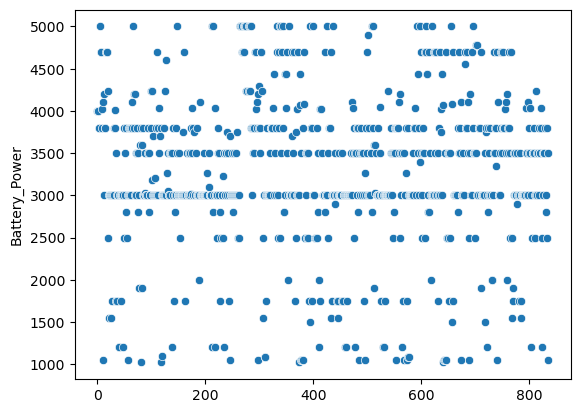

In [150]:
sns.scatterplot(data.Battery_Power)

In [151]:
data

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,LG,4.0,128.0,6.00,48,13.0,4000,24999
1,I,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia,4.0,4.0,4.50,64,16.0,4000,15000
3,Samsung,6.0,64.0,6.40,48,15.0,3800,18999
4,POCO,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
831,Karbonn,6.0,32.0,4.54,48,12.0,2800,1299
832,InFocus,8.0,64.0,4.54,64,8.0,2500,1390
833,Alcatel,3.0,32.0,6.20,48,1.0,3800,9790
834,JIVI,10.0,32.0,4.50,64,8.0,3500,799


<Axes: xlabel='Price', ylabel='Count'>

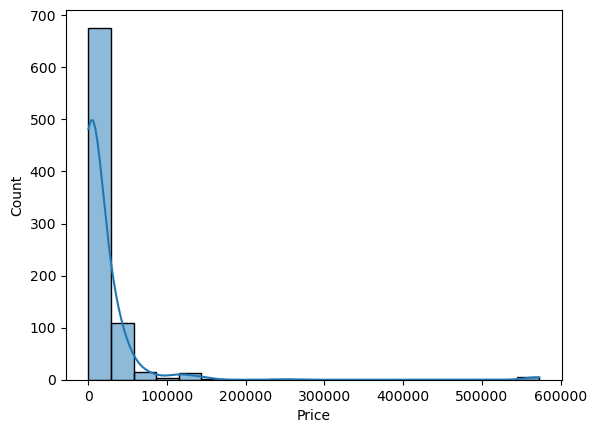

In [152]:
sns.histplot(data.Price,kde=True,bins=20)

In [153]:
data.loc[data["Price"]>200000]

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
35,Apple,12.0,128.0,6.10,35,7.0,3500,573000
115,Apple,12.0,64.0,6.10,35,7.0,3500,573000
191,Vivo,8.0,128.0,6.44,48,13.0,4100,253000
437,Samsung,8.0,128.0,6.10,48,12.0,3000,563000
454,Apple,12.0,64.0,6.10,35,7.0,3500,573000
500,Apple,12.0,64.0,6.10,35,7.0,3500,573000
774,Samsung,8.0,128.0,6.10,48,12.0,3000,563000


In [154]:
data=data.loc[data["Price"]<200000]

In [155]:
data.shape

(818, 8)

In [156]:
data.head()

,Brand,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,LG,4.0,128.0,6.00,48,13.0,4000,24999
1,I,6.0,64.0,4.50,48,12.0,4000,15999
2,Nokia,4.0,4.0,4.50,64,16.0,4000,15000
3,Samsung,6.0,64.0,6.40,48,15.0,3800,18999
4,POCO,6.0,128.0,6.18,35,15.0,3800,18999


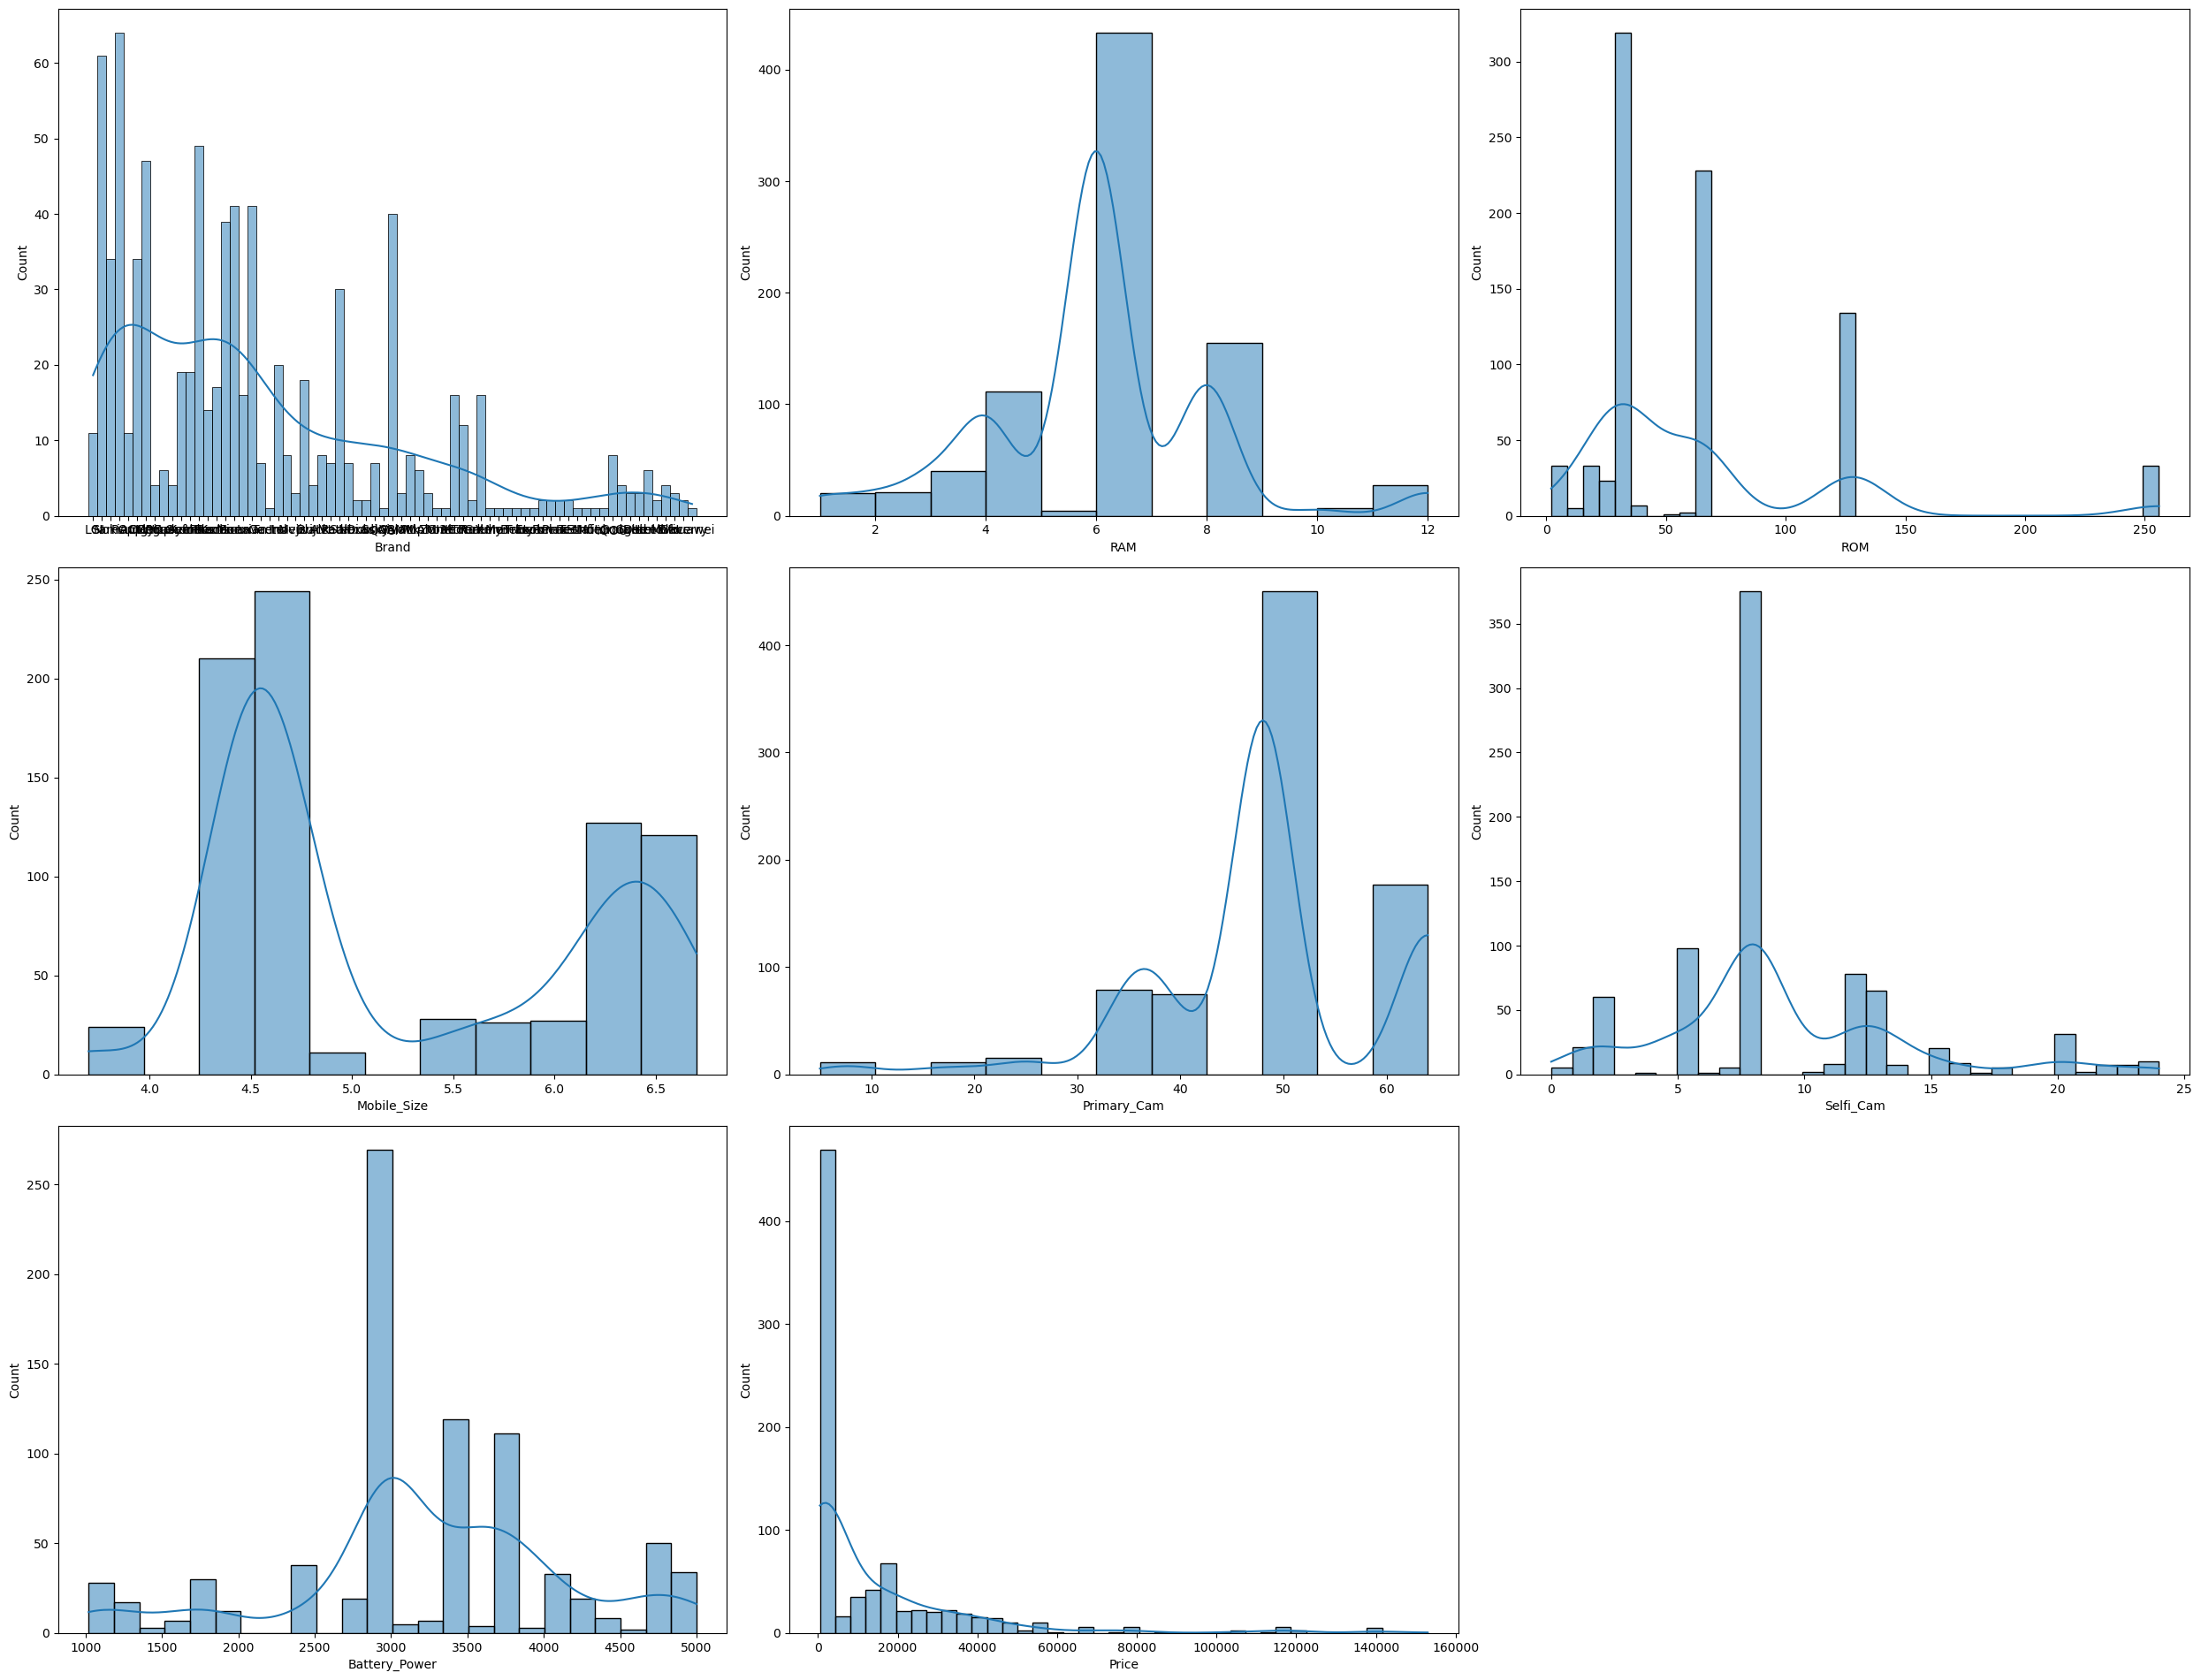

In [157]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in data:
    if plotnum<=8:
        a=plt.subplot(4,3,plotnum)
        sns.histplot(data[col],kde=True)
        plotnum+=1
        plt.tight_layout()

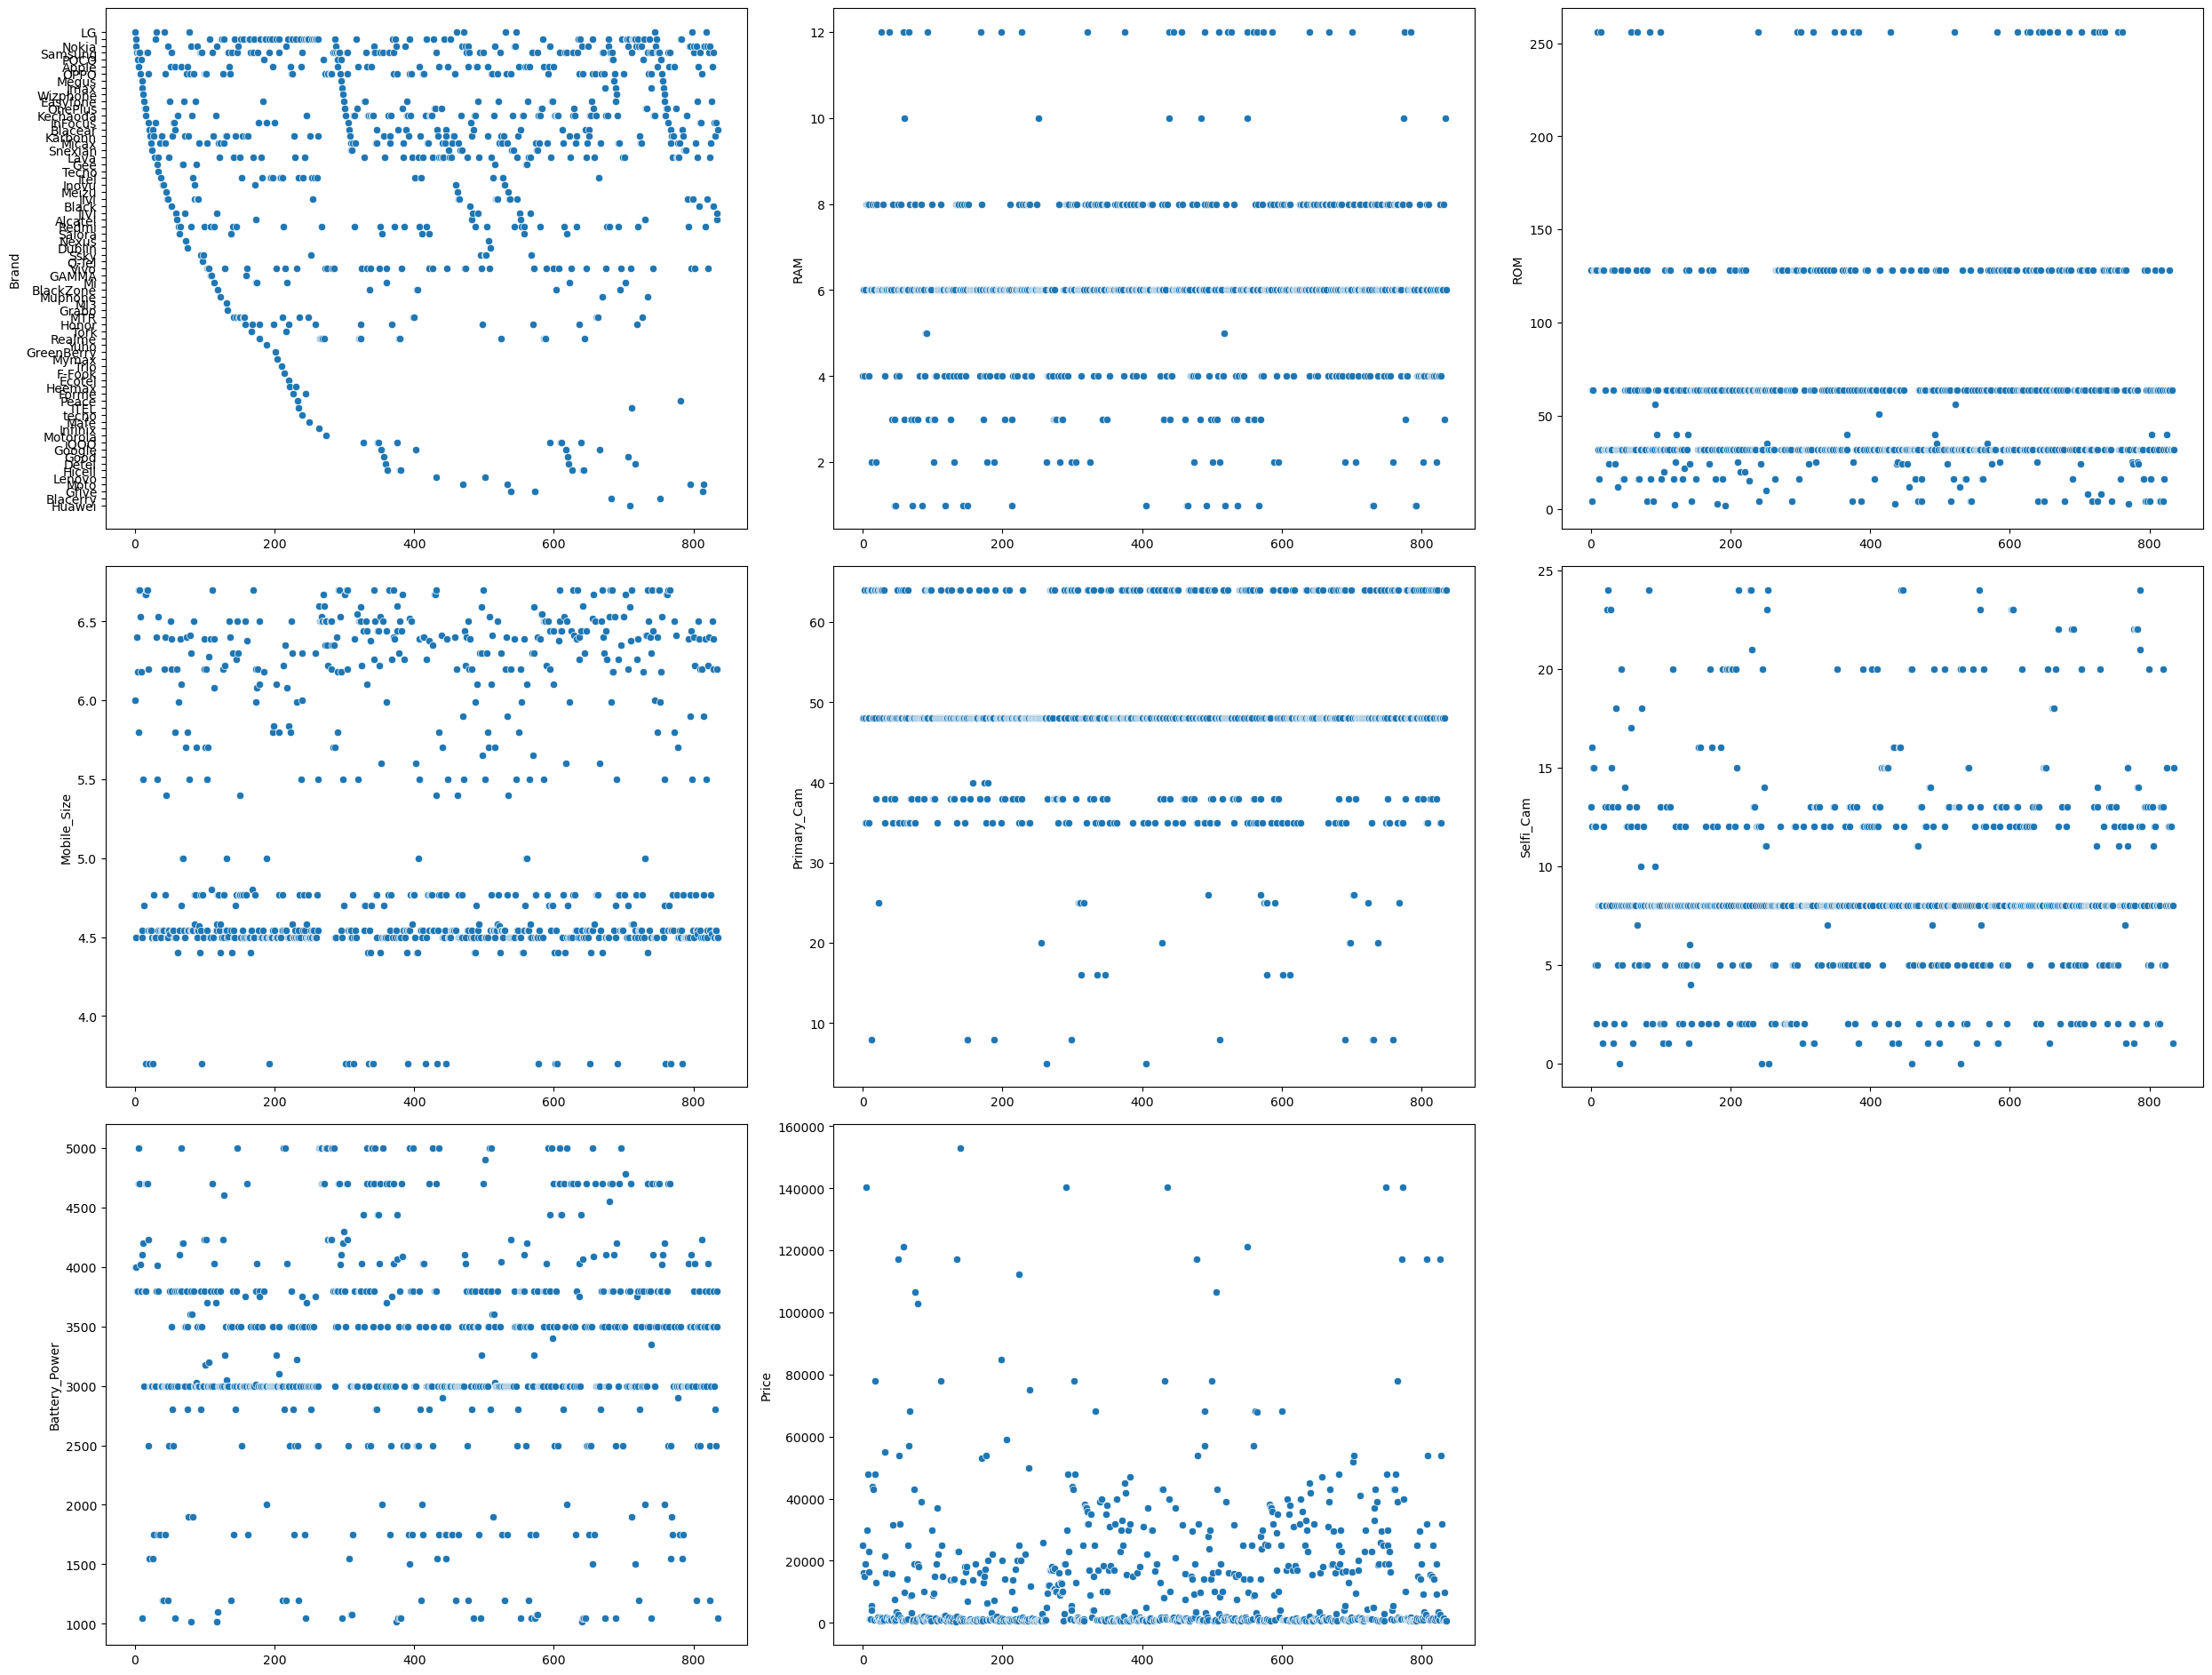

In [158]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in data:
    if plotnum<=8:
        a=plt.subplot(4,3,plotnum)
        sns.scatterplot(data[col])
        plotnum+=1
        plt.tight_layout()

## Model Creation

In [160]:
X=data.drop(columns=['Brand','Price'],axis=1)
y=data['Price']

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [162]:
X_train.shape

(654, 6)

In [163]:
X_test.shape

(164, 6)

In [164]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit on training data only

MinMaxScaler()

In [166]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
#model building
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(X_train_scaled,y_train)

LinearRegression()

In [168]:
y_predicted=lr1.predict(X_test_scaled)
y_predicted

array([  6282.63746948,   9176.84092445,  -5856.92759071,  32474.14811959,
         -805.5383632 ,  10677.22216341,   7812.67364677,   6063.88886495,
        43077.5198285 ,   9383.36110151,   1984.36679055,    991.54241035,
        30787.07373085,  -1743.55797115,  22182.28357335,   -632.62695255,
        31838.63035365,   3866.44761382,  -1628.7943972 ,   7539.76471663,
        25435.83596783,   3904.87498469,  24909.63853287,   7362.89583832,
        25972.68932004,   5293.8241198 ,  24523.33648859,    890.05512977,
        -8914.52605157,   6096.94543589,  -1531.08708683,   2256.11357888,
        38675.07940837,  36176.50540196,  29645.27288417,  32085.19350021,
         1127.08191599,  13834.72555302,  45130.23274377,   -744.53189027,
        12109.09102233,  26920.86714188,   1383.61545419,   4875.94950639,
         6678.06645505,  28515.95600578,  -3120.09954187,  14432.19143325,
        43077.5198285 ,   2482.84755502,  26624.2538199 ,  11867.1926851 ,
        24909.63853287,  

In [169]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [170]:
r2score=r2_score(y_test,y_predicted)
r2score

0.4008733047392926

In [171]:
MSE=mean_squared_error(y_test,y_predicted) # mean squared error
MSE

462126228.3443825

In [172]:
# Evaluate the model
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 462126228.34
Root Mean Squared Error: 21497.12
Mean Absolute Error: 11229.44
R² Score: 0.40


In [173]:
#using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(lr1,X_train_scaled,y_train,cv=5,scoring='r2').mean()

0.500480114287848

### using log transform

In [175]:
transformer =ColumnTransformer(transformers=[('log',FunctionTransformer(np.log1p),[0,1,2,3,4,5])])

In [176]:
X_train_log_tr=transformer.fit_transform(X_train)

In [177]:
X_test_log_tr=transformer.transform(X_test)

In [178]:
#model building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_log_tr,y_train)

LinearRegression()

In [179]:
y_predicted=lr.predict(X_test_log_tr)
y_predicted

array([  7855.32735866,   6142.25805524,  -2952.09598033,  33074.9679059 ,
         1545.64515194,  12554.07146578,   8724.37557228,  -2925.26389676,
        37405.28565974,   8598.92187979,   3481.06595222,   1335.93473884,
        31385.38107416,  -2422.63389048,  18588.56683778,   3676.72380236,
        31242.22395003,   4227.10640196,    941.10887665,   6968.71159576,
        18882.93338921,  -4183.8262488 ,  25047.28017436,   6597.87893223,
        27423.62784211,   6819.40518897,  25887.98366128,   2358.67999643,
        -6459.74790302,   5257.25107048,   1810.55814324,   3211.56726547,
        35483.21145439,  35469.58124901,  30229.46359501,  32842.03469704,
         4484.68487011,  11422.32517247,  43235.52804337,    379.07643923,
        11860.82268271,  27815.34080937,   2006.05946334,   6799.18410132,
         7578.58728453,  29279.64902656,   -836.89418501,  11830.33252133,
        37405.28565974,   3113.9378005 ,  27870.8546972 ,  12947.37126668,
        25047.28017436,  

In [180]:
r2score=r2_score(y_test,y_predicted)
r2score

0.38279594291329977

In [181]:
#using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train_log_tr,y_train,cv=5,scoring='r2').mean()

0.4802904660842874

### Checking with Decession tree regressor

In [183]:
from sklearn.tree import DecisionTreeRegressor

In [184]:
dtr=DecisionTreeRegressor()

In [185]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

[Text(0.5635162710110017, 0.9791666666666666, 'x[2] <= 5.45\nsquared_error = 466521746.974\nsamples = 654\nvalue = 13528.153'),
 Text(0.30376053862961744, 0.9375, 'x[4] <= 7.5\nsquared_error = 24345045.243\nsamples = 392\nvalue = 1986.88'),
 Text(0.4336384048203096, 0.9583333333333333, 'True  '),
 Text(0.06690539012438748, 0.8958333333333334, 'x[4] <= 6.0\nsquared_error = 195021320.089\nsamples = 38\nvalue = 8277.263'),
 Text(0.04560874481718809, 0.8541666666666666, 'x[3] <= 43.0\nsquared_error = 35715608.697\nsamples = 35\nvalue = 4615.4'),
 Text(0.01206181681115718, 0.8125, 'x[2] <= 4.62\nsquared_error = 47184315.822\nsamples = 15\nvalue = 9118.667'),
 Text(0.00603090840557859, 0.7708333333333334, 'x[1] <= 48.0\nsquared_error = 27848.0\nsamples = 3\nvalue = 1063.0'),
 Text(0.003015454202789295, 0.7291666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = 945.0'),
 Text(0.009046362608367886, 0.7291666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 1299.0'),
 Text(0.01809272521

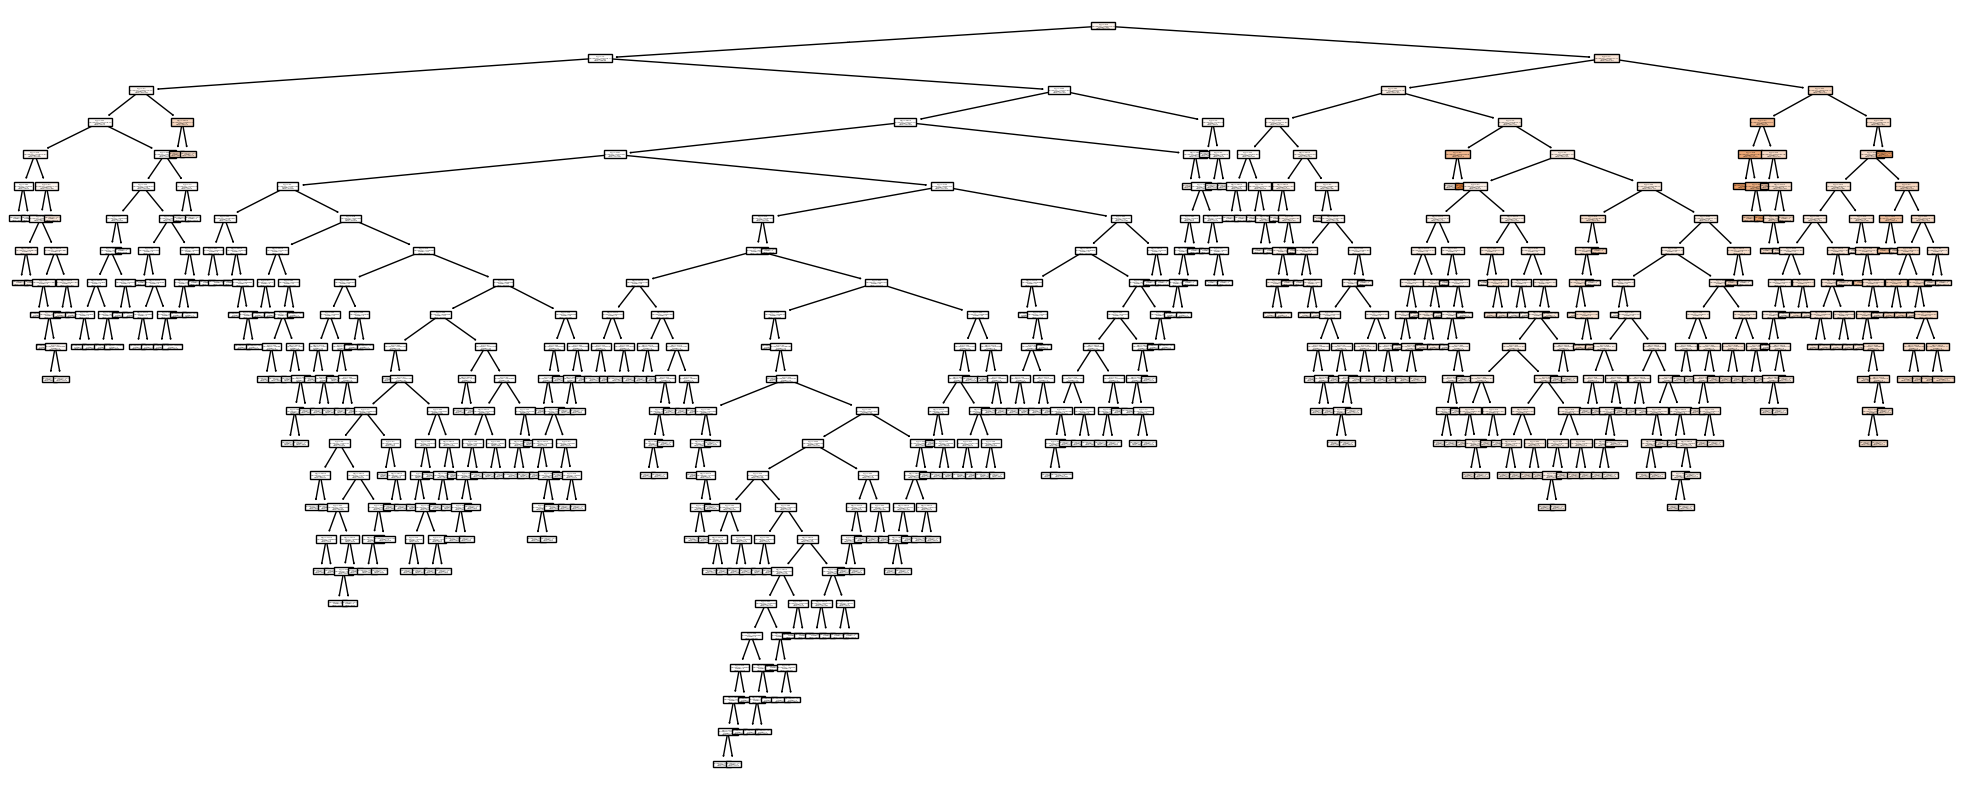

In [186]:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(dtr,filled=True)

In [187]:
y_predicted=dtr.predict(X_test)
y_predicted

array([  1062.33333333,   1570.        ,   1593.        ,  21999.        ,
         1678.        ,  13999.        ,    927.        ,   1690.        ,
        67820.        ,    799.        ,   8990.        ,    962.        ,
        16675.        ,   3812.33333333,   1275.        ,   3999.        ,
       121250.        ,   1099.        ,    846.77777778,   1246.75      ,
        38999.        ,   1690.        ,  16490.        ,    479.        ,
        16090.        ,    970.        ,  16990.        ,    649.        ,
          890.        ,   1240.        ,   1099.        ,    986.7       ,
        46970.        ,  68300.        ,  18999.        ,  21999.        ,
         3999.        ,    945.        ,  39999.        ,   1149.        ,
          784.4       ,  19990.        ,   1149.        ,   3999.        ,
         3999.        ,  19990.        ,    890.        ,    900.        ,
        67820.        ,    999.        ,  14494.5       ,   1062.33333333,
        16490.        ,  

In [188]:
r2score=r2_score(y_test,y_predicted)
r2score

0.7677915681291906

In [189]:
#using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(dtr,X_train,y_train,cv=5,scoring='r2').mean()

0.8439541007109215

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error']
}

In [192]:
# Initialize Grid Search
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

In [193]:
# Assuming X_train and y_train are your training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [194]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.8900751362960897


In [195]:
# Retrieve the best model
best_dtr = grid_search.best_estimator_

# Predict and evaluate on test data
y_pred = best_dtr.predict(X_test)

In [196]:
r2score=r2_score(y_test,y_pred)
r2score

0.854850190743659

In [312]:
from joblib import dump

# Save the model to a joblib file
dump(best_dtr, "best_decision_tree_model.joblib")

print("Model saved as 'best_decision_tree_model.joblib'")

Model saved as 'best_decision_tree_model.joblib'


In [314]:
from joblib import load

# Load the model
loaded_model = load("best_decision_tree_model.joblib")
loaded_model

DecisionTreeRegressor(max_features='sqrt', min_samples_split=5)

In [316]:
# Use the loaded model for prediction
y_loaded_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
loaded_r2_score = r2_score(y_test, y_loaded_pred)
print("R² Score of Loaded Model:", loaded_r2_score)

R² Score of Loaded Model: 0.854850190743659
